In [2]:
import pandas as pd
import numpy as np 
import re 
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv('archive/Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
df.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

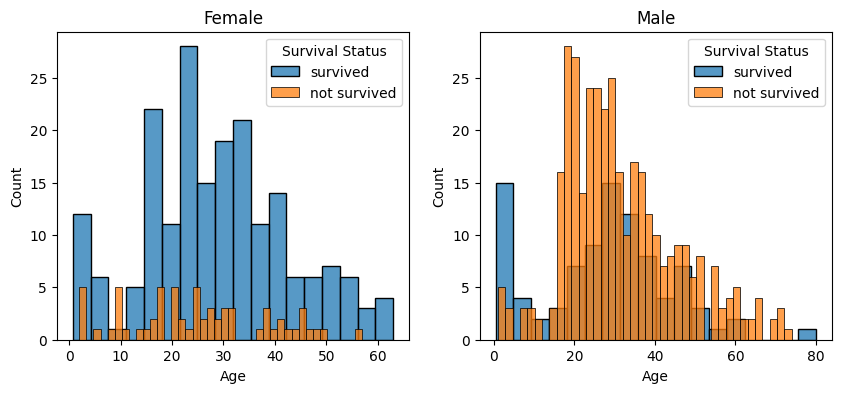

In [7]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

ax = sns.histplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.histplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)

# Manually create legend labels for the first subplot
ax.legend(title="Survival Status", labels=[survived, not_survived])

ax.set_title('Female')

ax = sns.histplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax = sns.histplot(men  [men['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)

# Manually create legend labels for the second subplot
ax.legend(title="Survival Status", labels=[survived, not_survived])

_ = ax.set_title('Male')


In [8]:
total = df.isnull().sum().sort_values(ascending=False)
miss_val=df.isnull().sum()/df.isnull().count()*100
miss_val2=(round(miss_val,1)).sort_values(ascending=False)
missing_data=pd.concat([total,miss_val2],axis=1)
missing_data.columns=['total','%']
missing_data.head(5)

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [9]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
(891, 12)


In [10]:
# Correlation analysis
correlation = df[['Age', 'Fare']].corr()
print(correlation)

# Cross-tabulation
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print(cross_tab)

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


Data Preprocessing

In [11]:
df=df.drop(['PassengerId'],axis=1)
df=df.drop(['Cabin'],axis=1)

In [12]:
df['Embarked'].describe()
df['Embarked'].head(50)

0     S
1     C
2     S
3     S
4     S
5     Q
6     S
7     S
8     S
9     C
10    S
11    S
12    S
13    S
14    S
15    S
16    Q
17    S
18    S
19    C
20    S
21    S
22    Q
23    S
24    S
25    S
26    C
27    S
28    Q
29    S
30    C
31    C
32    Q
33    S
34    C
35    S
36    C
37    S
38    S
39    C
40    S
41    S
42    C
43    C
44    Q
45    S
46    Q
47    Q
48    C
49    S
Name: Embarked, dtype: object

In [13]:
common_value='S'
df['Embarked']=df['Embarked'].fillna(common_value)
df['Embarked'].head(50)

0     S
1     C
2     S
3     S
4     S
5     Q
6     S
7     S
8     S
9     C
10    S
11    S
12    S
13    S
14    S
15    S
16    Q
17    S
18    S
19    C
20    S
21    S
22    Q
23    S
24    S
25    S
26    C
27    S
28    Q
29    S
30    C
31    C
32    Q
33    S
34    C
35    S
36    C
37    S
38    S
39    C
40    S
41    S
42    C
43    C
44    Q
45    S
46    Q
47    Q
48    C
49    S
Name: Embarked, dtype: object

In [14]:
ports = {"S": 0, "C": 1, "Q": 2}

df['Embarked']= df['Embarked'].map(ports)

df['Embarked'].info()
df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0


In [15]:
df['Fare']=df['Fare'].fillna(0)
df['Fare']=df['Fare'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    int32  
 9   Embarked  891 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 66.3+ KB


In [16]:
#convert 'Sex into numeric value
genders={'male':0,'female':1}
df['Sex']= df['Sex'].map(genders)

In [17]:
for age in df:
    mean=df['Age'].mean()
    std=df['Age'].std()
    is_null=df['Age'].isnull().sum()
#fill random values in age 
    random_age=np.random.randint(mean-std,mean+std,size=is_null)
    age_slice=df['Age'].copy()
    age_slice[np.isnan(age_slice)]=random_age
    df["Age"]=age_slice
print(mean,std,random_age)

29.6399214365881 13.562992879026277 []


In [18]:

df['age_category']= df.Age.map(lambda age:'Kid'if age <18 else "Adult")
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,0,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,1,Adult
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,0,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,0,Adult
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,0,Adult
5,0,3,"Moran, Mr. James",0,37.0,0,0,330877,8,2,Adult
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51,0,Adult
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21,0,Kid
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11,0,Adult
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30,1,Kid


In [19]:
total = df.isnull().sum().sort_values(ascending=False)
miss_val=df.isnull().sum()/df.isnull().count()*100
miss_val2=(round(miss_val,1)).sort_values(ascending=False)
missing_data=pd.concat([total,miss_val2],axis=1)
missing_data.columns=['total','%']
missing_data.head(5)

,total,%
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0


In [20]:
df['Ticket'].describe()
df=df.drop(['Ticket'],axis=1)

In [21]:
df['SibSp'].head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [22]:
feature = ['Pclass','Sex','Age','SibSp','Parch']
X=df[feature]
Y=df['Survived']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=4)
model.fit(X_train, Y_train)


RandomForestClassifier(random_state=4)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(Y_test, Y_pred))


Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.80      0.65      0.71        79

    accuracy                           0.77       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [26]:
# Example: Grid Search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=4), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_
print(best_model)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=4)


In [27]:

Y_pred = best_model.predict(X_test)
accuracy2 = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy2:.2f}')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.83      0.67      0.74        79

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.79      0.79       179



In [28]:
# Example: Making predictions on new data
new_passenger_data = pd.DataFrame([[3, 0, 25, 0, 0]], columns=feature) 
prediction = best_model.predict(new_passenger_data)
print(f'Predicted Survival: {prediction[0]}')


Predicted Survival: 0
